# 🚢 Titanic Survival Prediction – End-to-End Data Science Project
## By Abdullah Arshad,

This notebook presents a complete machine learning pipeline on the classic Titanic dataset. It walks through **exploratory data analysis (EDA)**, **feature engineering**, and **model training** to predict passenger survival.

---

## 📌 Project Goals

- Understand the structure and trends in Titanic data  
- Engineer meaningful features from raw data  
- Compare machine learning models (Logistic Regression vs Random Forest)  
- Generate accurate predictions for Kaggle submission  

---

## 🔍 Key Highlights

✅ Cleaned missing values (`Age`, `Fare`, `Embarked`)  
✅ Engineered new features like `FamilySize`  
✅ Visualized survival trends by gender, class, age group, etc.  
✅ Trained & compared models:
- Logistic Regression (Accuracy: 81%)
- Random Forest Classifier (Accuracy: 82.6%)

✅ Created `submission.csv` for Kaggle competition  
✅ Explained insights and model decisions throughout  

---

## 🛠 Tech Stack

- Python 3.x  
- Pandas, NumPy, Seaborn, Matplotlib  
- Scikit-learn  
- Jupyter/Colab Notebook  

---

## 🧠 What You’ll Learn

- How to explore and visualize tabular data  
- How to deal with missing values and categorical features  
- How to build and evaluate classification models  
- How to prepare a valid Kaggle submission  

---

## 📈 Kaggle Score

🏆 **Public Leaderboard Score:** 0.74880  
🧠 **Model Used:** Random Forest  

---

## 📂 Files
- `titanic.zip`- Dataset
- `titanic_analysis.ipynb` – Full notebook  
- `submission.csv` – Kaggle submission file  

---

## 🔗 Connect with Me

- 💼 **LinkedIn**: www.linkedin.com/in/abdullah-arshad-ds
- 📁 **GitHub Repository**: https://github.com/Abdul00YO/Titanic_Datascience_project


---


## Installing dependencies and setting up the environment

In [61]:
# Colab now comes with already installed libraries we just have to import them
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
sns.set()

In [12]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
sample_submission=pd.read_csv('gender_submission.csv')

## Inspecting the data

In [13]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
sample_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [15]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# So we have three files, right now we'll just use train.csv and test.csv for our analysis and model making.

## Exploratory Data Analysis

In [16]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5000,NaN,S
225,226,0,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5000,NaN,S
424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S
784,785,0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.0500,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
# There are 5 non numeric columns:
# Name, Sex, Ticket, Cabin and Embarked

# Three columns contain missing values:
# Age, Cabin and Embarked

In [19]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
# This data has no negative values.
# Data is almost cleaned just has some missing values.

## Data Cleaning:

In [21]:
# Data cleaning must be done on both train.csv and test.csv files both files should be in same format
# Fill Misssing values in Age column:
# we used median not mean because data is not uniform and median always give center value
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

In [22]:
# We used mode to fill the 2 missing values because that column is non numerical.
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [23]:
# We will drop this column since it has so many missing values and it is not as important
train_df.drop('Cabin', axis=1, inplace=True)

In [24]:
# We drop this column as it has mixed values and isn't important
train_df.drop('Ticket', axis=1, inplace=True)

In [25]:
# Converting sex into numerical 0 and 1
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

In [26]:
# Converting embarked into numerical 0, 1 and 2
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 69.7+ KB


In [28]:
# Now this data is cleaned and got no missing values
# Now checking test_df data for missing values

In [29]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [30]:
# It also have same data types as train
# Missing values in age, fare and cabin
# We will have to bring it in the same format as train_df

In [31]:
# Fill missing Age with median
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

In [32]:
# Fill missing Fare with median
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

In [33]:
# Drop Cabin and Ticket (if not being used as features)
test_df.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

In [45]:
# Converting sex into numerical 0 and 1
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

In [46]:
# Converting embarked into numerical 0, 1 and 2
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [47]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 29.5+ KB


## Insights from data





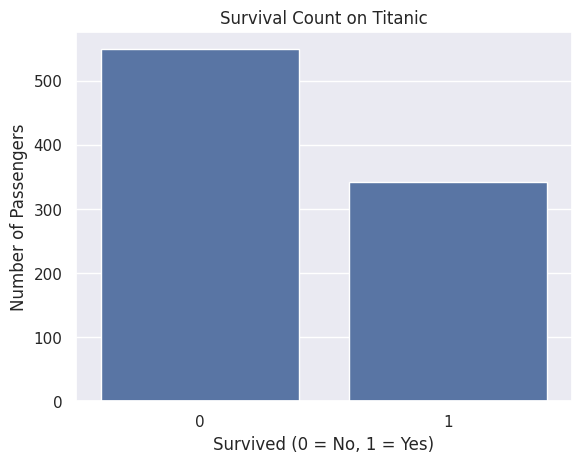

In [35]:
# Survived vs unsurvived
sur=train_df.Survived.value_counts()
sns.barplot(x=sur.index, y=sur.values)
plt.title("Survival Count on Titanic")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.show()

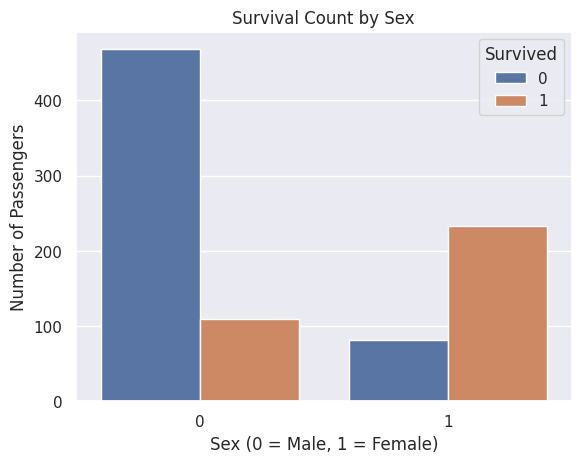

In [49]:
# Survival W.R.T Gender
train_df.Sex.value_counts()
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title("Survival Count by Sex")
plt.xlabel("Sex (0 = Male, 1 = Female)")
plt.ylabel("Number of Passengers")
plt.show()

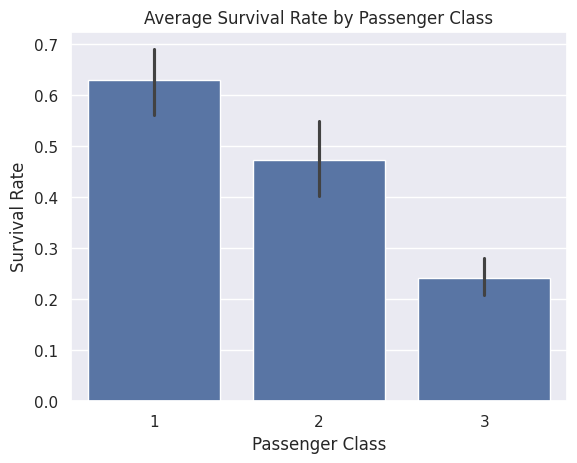

In [37]:
# Survival rate W.R.T Passenger class
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title("Average Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

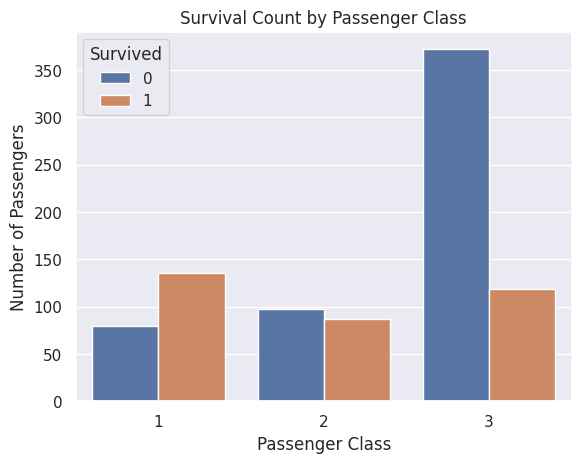

In [38]:
# Survival Count W.R.T Passenger Class
sns.countplot(x='Pclass', data=train_df, hue='Survived')
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.show()


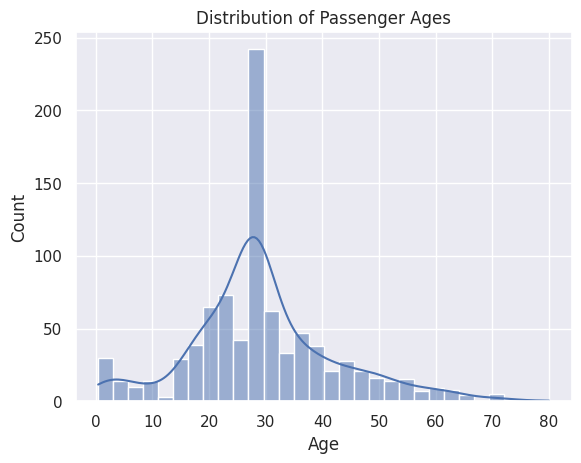

In [39]:
# Passengers count with respect to Age
sns.histplot(data=train_df, x='Age', kde=True, bins=30)
plt.title("Distribution of Passenger Ages")
plt.show()

In [40]:
# Making Age Groups for clear analysis
train_df['AgeBin'] = pd.cut(train_df['Age'],
                            bins=[0, 12, 18, 35, 60, 100],
                            labels=['Child(0-12)', 'Teen(12-18)', 'Young Adult(18-35)', 'Adult(35-60)', 'Senior(60-100)'])

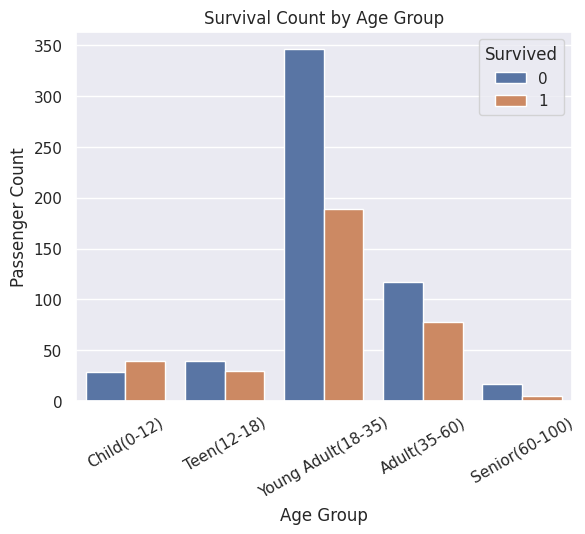

In [41]:
# Survival count W.R.T Age groups we created
# Plot with rotated labels
sns.countplot(data=train_df, x='AgeBin', hue='Survived')
plt.title("Survival Count by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Passenger Count")
plt.xticks(rotation=30)  # Rotate x-axis labels for better visibility
plt.show()

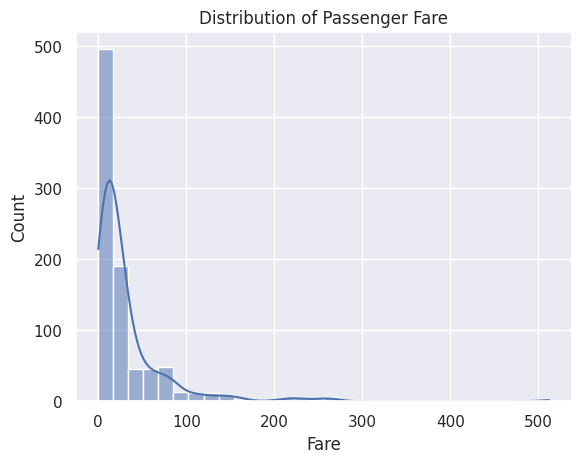

In [42]:
# Fare of passengers
sns.histplot(train_df['Fare'], bins=30, kde=True)
plt.title("Distribution of Passenger Fare")
plt.show()


## Feature Selection:

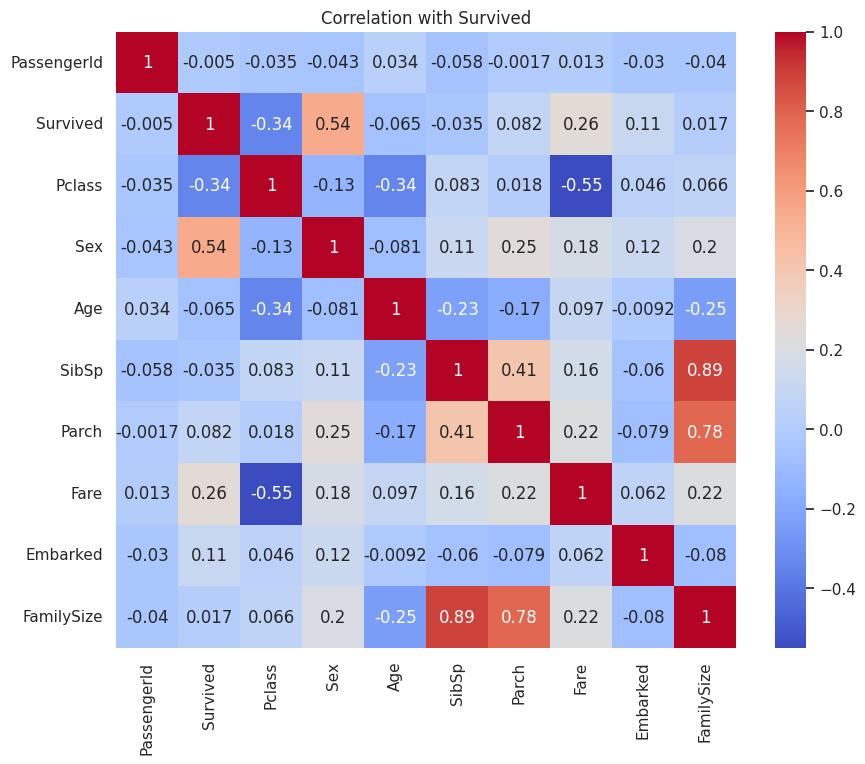

In [58]:
# We will draw a heatmap to find the correlation of each column with others
corr = train_df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation with Survived")
plt.show()


## Feature Engineering:

In [ ]:
# Parch is the number of parents/children with them
# SibSp is the number of siblings with them
# We can make a new column by merging these two columns and add 1 as a person himself, this will considered a new column as "FamilySize"

In [56]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

In [ ]:
# For test data as well since we have to bring that features in test_df as well

In [66]:
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [ ]:
# Final features after finding correlation, feature engineering and real world logic
features = [
    'Pclass',
    'Sex',
    'Fare',
    'Age',
    'Embarked',
    'FamilySize'
]


## Model Training:

In [60]:
# First we will use Logistic Regression
features = ['Pclass', 'Sex', 'Fare', 'Age', 'Embarked', 'FamilySize']
X = train_df[features]
y = train_df['Survived']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.8100558659217877


In [62]:
# Now we will check for Random Forest
features = ['Pclass', 'Sex', 'Fare', 'Age', 'Embarked', 'FamilySize']
X = train_df[features]
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.8268156424581006


In [69]:
# As we can see Random Forest give more accuracy so we'll use this model

## Model Prediction:

In [70]:
# Now we will predict the test_df using our trained Random Forest Model
features = ['Pclass', 'Sex', 'Fare', 'Age', 'Embarked', 'FamilySize']
X_test = test_df[features]
predictions = rf_model.predict(X_test)


✅ submission.csv is ready for Kaggle!


## Output/Submission file:

In [ ]:
# Making a Submission File
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions
})

submission.to_csv('submission.csv', index=False)
print("submission.csv is ready for Kaggle!")